# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats
from numpy.random import seed
medical = pd.read_csv('../data/insurance2.csv')

In [3]:
medical


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

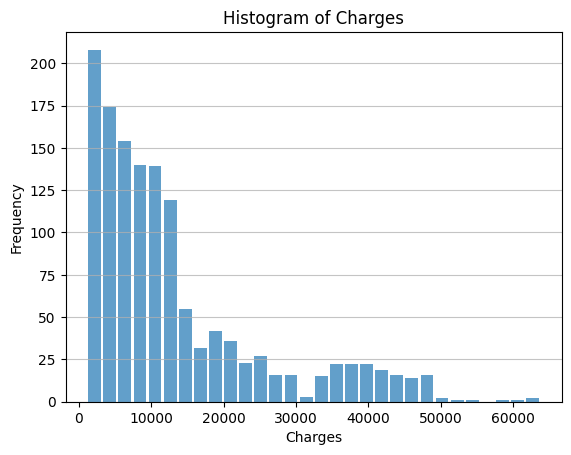

In [6]:
# Plotting
plt.hist(medical['charges'], bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [7]:
# Mean
mean_charges = medical['charges'].mean()

# Standard Deviation
std_charges = medical['charges'].std()

mean_charges, std_charges

(np.float64(13270.422265141257), np.float64(12110.011236694001))


Comment:  The mean of the charges is 13270.42, and the std deviation is 12110.01. But looking at the histogram of the distribution of the charges is skewed to the right with along tail in the that direction. The mean would be greater than the median indicating influence of extreme outliers of charges. Using the median would be more appropriate for exploring central tendencies and the interquartile ranges would more appropriate for measures of spread instead of standard deviation. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ With a random sample assumption, the mean of the sample should be representative of the larger sample, despite the skewness of the data. The t-test would be an appropriate frequentist test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the administrator is concerned with the average of the charging having fallen below 12,000 only, a on-sided t-test would be appropriate. The null hypothesis (H0) in a one-sided (right) test may be set-up as : The charges mean is below 12,000. The alternative hypothesis (Ha) would be : The mean of charges is equal to or more than 12,000.

A 95% confidence interval may be appropriate, but a higher confidence interval of 99% may be chosen, if more confidence in the answer is required, such as ensuring more certain budgeting for the hospital. 

In [8]:
# The null hypothesis: H0: μ < 12,000
# a right-tailed test (H0: μ < 12,000 vs Ha: μ ≥ 12,000)

# Calculate the right-tailed critical value
critical_value_right = stats.t.ppf(0.95, df=len(medical['charges']) - 1)
# Calculate the t-score
t_score = (mean_charges - 12000) / (std_charges / np.sqrt(len(medical['charges'])))
t_score
print(t_score)
p_value = stats.t.sf(t_score, df=len(medical['charges']) - 1)
print(p_value)



3.8373517196585323
6.508582604643578e-05


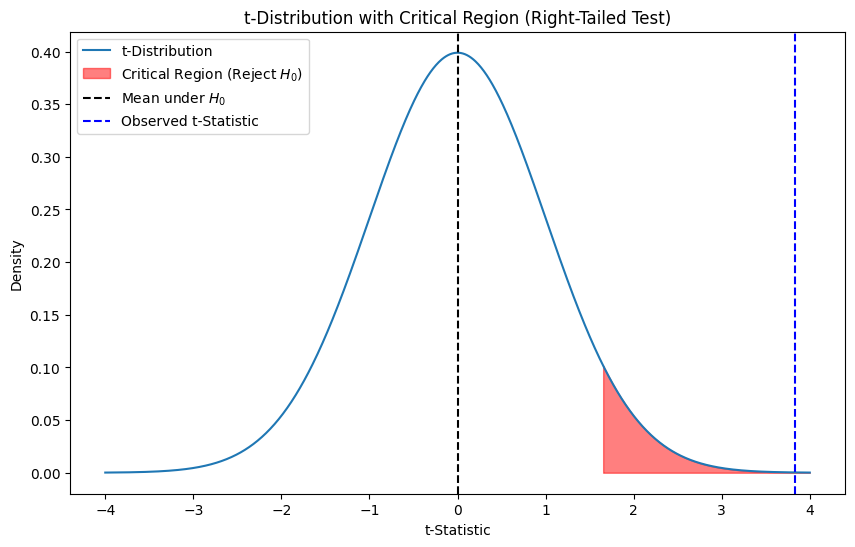

In [9]:
# The null hypothesis: H0: μ < 12,000
# a right-tailed test (H0: μ < 12,000 vs Ha: μ ≥ 12,000)
# Parameters for the test
test_value = 12000  # Hypothesized mean

# Calculate the sample mean and standard error of the mean
mean_charges = medical['charges'].mean()
std_error = medical['charges'].std(ddof=1) / (len(medical['charges']) ** 0.5)

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(medical['charges'], test_value)

# Calculate the critical value for a one-tailed right-sided test (95% confidence level)
critical_value_right = stats.t.ppf(0.95, df=len(medical['charges']) - 1)

# Calculate the one-sided confidence interval upper bound
upper_bound_right_tailed = mean_charges + critical_value_right * std_error

# Generate data for the t-distribution and plot the probability graph
x = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(x, df=len(medical['charges']) - 1)

plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label='t-Distribution')
plt.fill_between(x, t_dist, 0, where=(x >= critical_value_right), color='red', alpha=0.5, label='Critical Region (Reject $H_0$)')
plt.axvline(0, color='black', linestyle='--', label='Mean under $H_0$')
plt.axvline((mean_charges - test_value) / std_error, color='blue', linestyle='--', label='Observed t-Statistic')
plt.title('t-Distribution with Critical Region (Right-Tailed Test)')
plt.xlabel('t-Statistic')
plt.ylabel('Density')
plt.legend()
plt.show()



In [10]:
# Print results
print("One-Sample t-Test Results (Right-Tailed):")
print(f"Test Value (Hypothesized Mean): {test_value}")
print(f"Sample Mean: {mean_charges:.2f}")
print(f"Standard Error of the Mean: {std_error:.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"p-Value: {p_value:.5f}")
print(f"Critical Value (Right-Tailed, 95%): {critical_value_right:.2f}")
print(f"One-Sided 95% Confidence Interval Upper Bound: {upper_bound_right_tailed:.2f}")

One-Sample t-Test Results (Right-Tailed):
Test Value (Hypothesized Mean): 12000
Sample Mean: 13270.42
Standard Error of the Mean: 331.07
t-Statistic: 3.84
p-Value: 0.00013
Critical Value (Right-Tailed, 95%): 1.65
One-Sided 95% Confidence Interval Upper Bound: 13815.36


--A-- The administrator should confidently (with 95% confidence)conclude that the average charges are not below $12,000.
Since the t-statistic (3.84) exceeds the critical value (1.65) and the p-value is extremely small, the null hypothesis (that the mean of our sample is less than 12000) is rejected.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
Dividing the sample into 2 groups, with and without insurance:
Group1: people with insurance = 1
Group2: people without insurance = 0
Null hypothesis: The mean charges are equal for both groups (mean_group_1 = mean_group_2)
Alternative hypothesis: The mean charges are NOT equal for both groups (mean_group_1 not equal to mean_group_2)
We assume variances between the two groups are not different.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [11]:
# Separate the data into two groups based on insurance claim status
group_with_insurance = medical[medical['insuranceclaim'] == 1]['charges']
group_without_insurance = medical[medical['insuranceclaim'] == 0]['charges']

# Calculate means, standard deviations, and sample sizes for both groups
mean_with_insurance = group_with_insurance.mean()
mean_without_insurance = group_without_insurance.mean()
std_with_insurance = group_with_insurance.std(ddof=1)
std_without_insurance = group_without_insurance.std(ddof=1)
n_with_insurance = len(group_with_insurance)
n_without_insurance = len(group_without_insurance)

In [12]:
# Calculate the pooled standard deviation
pooled_std = np.sqrt(
    ((n_with_insurance - 1) * std_with_insurance**2 + (n_without_insurance - 1) * std_without_insurance**2) /
    (n_with_insurance + n_without_insurance - 2)
)

In [13]:
# Calculate the t-statistic
t_statistic = (mean_with_insurance - mean_without_insurance) / (
    pooled_std * np.sqrt(1/n_with_insurance + 1/n_without_insurance)
)

In [14]:
# Calculate degrees of freedom and p-value
df = n_with_insurance + n_without_insurance - 2
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=df))  # Two-tailed test

In [15]:
# Print results
{
    "mean_with_insurance": mean_with_insurance,
    "mean_without_insurance": mean_without_insurance,
    "pooled_std": pooled_std,
    "t_statistic": t_statistic,
    "p_value": p_value,
    "degrees_of_freedom": df
}

{'mean_with_insurance': np.float64(16423.928276537677),
 'mean_without_insurance': np.float64(8821.421892306305),
 'pooled_std': np.float64(11520.034268775262),
 't_statistic': np.float64(11.89329903087671),
 'p_value': np.float64(0.0),
 'degrees_of_freedom': 1336}

Results of manual calculation:
'mean_with_insurance': 16423.928276537677,
'mean_without_insurance': 8821.421892306305,
'pooled_std': 11520.034268775262,
't_statistic': 11.89329903087671,
'p_value': 0.0,
'degrees_of_freedom': 1336}

# Using scipy.stats



In [16]:
# Using scipy.stats for independent two-sample t-test (Welch's t-test by default)

# Manual calculation (already performed above)
manual_results = {
    "mean_with_insurance": mean_with_insurance,
    "mean_without_insurance": mean_without_insurance,
    "pooled_std": pooled_std,
    "t_statistic": t_statistic,
    "p_value": p_value,
    "degrees_of_freedom": df,
}

t_stat_scipy, p_value_scipy = stats.ttest_ind(
    group_with_insurance, group_without_insurance, equal_var=True  # Specify pooled standard deviation
)

# Scipy function results
scipy_results = {
    "t_statistic_scipy": t_stat_scipy,
    "p_value_scipy": p_value_scipy,
}

# Combine and display results for comparison
{
    "manual_results": manual_results,
    "scipy_results": scipy_results,
}


{'manual_results': {'mean_with_insurance': np.float64(16423.928276537677),
  'mean_without_insurance': np.float64(8821.421892306305),
  'pooled_std': np.float64(11520.034268775262),
  't_statistic': np.float64(11.89329903087671),
  'p_value': np.float64(0.0),
  'degrees_of_freedom': 1336},
 'scipy_results': {'t_statistic_scipy': np.float64(11.893299030876712),
  'p_value_scipy': np.float64(4.461230231620717e-31)}}

The results from the manual calculation and the scipy.stats.ttest_ind function are consistent. The difference in charges means between the two groups, with insurance and without insurance, is different and statistically significant,and that the probability of this result occurring by chance is extremely small, near zero. Individuals with insurance are charged substantially more on average. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no single z-test function in the scipy documentation. One can calculate the zscore manually from the sample mean, the null hypothesis mean, the population std deviation and the sample size.
The formula for the z-score is:

\begin{equation}
z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
\end{equation}

Where:
- \( z \): z-score
- \( \bar{X} \): Sample mean
- \( \mu_0 \): Hypothesized population mean
- \( \sigma \): Population standard deviation (assumed known)
- \( n \): Sample size

Then, one can use scipy.stats.norm.cdf() function to compute the p-value.

Generally, the guidelines for using the z-test vs the t-test: 
- Use a **z-test** when:
  - The population standard deviation is known.
  - The sample size is large, eg  > 30 ).
  - The population is approximately normal.

- Use a **t-test** when:
  - The population standard deviation is unknown.
  - The sample size is small.

Example:
# Calculate sample statistics
sample_mean = np.mean(sample)
n = len(sample)

# Calculate the z-score
z_score = (sample_mean - Hypothesized population mean) / (Population standard deviation (known) / np.sqrt(n))

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_score)))

\
\
In most statistical analyses, the std deviation is not known for the population and the t-test is used.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test